In [1]:
import tweepy
import json
import pandas as pd
from perspective import PerspectiveAPI
from googleapiclient import discovery
import numpy as np
import re
import time
from tqdm.notebook import tqdm
path_files ="C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Files/"
path_data = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/"

In [5]:
jsonFile = open(path_files + 'auth.json', 'r')
config = json.load(jsonFile)
jsonFile.close()
API_KEY = config["api_key_1"]

# Clean text and write

In [6]:
strng = "@Cristiano è il nostro #MVP? si: https://google.com"

In [7]:
def clean(x: str):
    if ("http" in x):
        x = re.sub(r'http\S+', '',x)
    x = re.sub('[@#$]', '', x)
    x = re.sub('\n', ' ', x)
    return x

In [8]:
clean(strng)

'Cristiano è il nostro MVP? si: '

In [3]:
df_bad = pd.read_csv(path_data + "bad_activities.csv")
df_good = pd.read_csv(path_data + "good_activities.csv")
df_suspended = pd.read_parquet(path_data + "tweets_bad_suspended.parquet", engine="fastparquet")
df_suspended_good= pd.read_parquet(path_data + "tweets_good_suspended.parquet", engine="fastparquet")
tweets = pd.read_parquet(path_data + "tweets.parquet", engine="fastparquet")

In [40]:
# tweets.head()

In [92]:
# x = list(tweets["text"])
# y = list(tweets["id"])
# count = 0
lst_id = []
lst_text = []
for i in tqdm(range(len(x))):
    lst_id.append(y[i])
    lst_text.append(clean(x[i]))
pd.DataFrame(list(zip(lst_id,lst_text)),columns=["id","text"]).to_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/df_cleaned.csv",
                                                                     line_terminator="\n", encoding="utf-8", index=False)

In [2]:
esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/df_cleaned.csv",
                              lineterminator="\n", low_memory=False, encoding="utf-8")

In [9]:
lst_final = []
x2 = list(set(esempio["text"]))
for i in tqdm(x2[1:]):
    if len(i.split(" ")) >= 4:
        lst_final.append(i)

In [23]:
n = 11
splited = [lst_final[i::n] for i in range(n)]


In [25]:
count = 0
for i in splited:
    pd.DataFrame(i, columns=["text"]).to_csv(f"C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/example_{count}.csv",
                           line_terminator="\n", index=False, encoding="utf-8")
    count = count + 1


In [12]:

# esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/example.csv",
#                               lineterminator="\n", low_memory=False, encoding="utf-8")
# esempio

In [87]:
# print(len(x2))
# count = 0
# for i in x2:
#     if len(i.split(" ")) < 4:
#         count = count + 1
#         print(i)
# print(count)
# 1499124 - 69376
# 1500000 / 50000

# Classification

In [3]:
# p = PerspectiveAPI(api_key=API_KEY)
# results = []
# for i in tqdm(texts):
#     time.sleep(1)
#     try:
#         result = p.score(i)
#         results.append(result["TOXICITY"])
#     except Exception as e:
#         print("Error: ", e)

In [70]:
print(f"Primi 1000 tweet Good {0.03} Toxicity score")
print(f"Primi 1000 tweet Good susp {0.10} Toxicity score")
print(f"Primi 1000 tweet Bad susp {0.12} Toxicity score")
print(f"Primi 1000 tweet Bad {0.09} Toxicity score")

Primi 1000 tweet Good 0.03 Toxicity score
Primi 1000 tweet Good susp 0.1 Toxicity score
Primi 1000 tweet Bad susp 0.12 Toxicity score
Primi 1000 tweet Bad 0.09 Toxicity score


In [2]:
# client = discovery.build(
#   "commentanalyzer",
#   "v1alpha1",
#   developerKey=API_KEY,
#   discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
#   static_discovery=False,
# )

# analyze_request = {
#   'comment': { 'text': "guarda, sei bravo!"},
#   'requestedAttributes': {'TOXICITY': {}}
# }

# response = client.comments().analyze(body=analyze_request).execute()
# print(json.dumps(response, indent=2))

# Ricomposizione DF

In [2]:
esempio = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/texts/df_cleaned.csv",
                              lineterminator="\n", low_memory=False, encoding="utf-8")

In [3]:
esempio.head()

,id,text
0,1221739084449832960,La Memoria è l’unico vaccino contro l’indiffer...
1,1221737155380293640,"Oggi sono arrivati loro, 3 femminucce e 1 masc..."
2,1221730009989120001,L'indifferenza è più colpevole della violenza ...
3,1221737654909382662,"Minaccia morbillo nel Salento, Asl: ""Vaccinars..."
4,1221728980203724801,"""Coltivare la Memoria è ancora oggi un vaccino..."


In [ ]:
tweets = pd.read_parquet(path_data + "tweets.parquet", engine="fastparquet")[["id","user_screen_name"]]

In [ ]:
tweets.head()

In [6]:
df = esempio.merge(tweets, on="id", how="left")
df.head()

,id,text,user_screen_name
0,1221739084449832960,La Memoria è l’unico vaccino contro l’indiffer...,planetpaul65
1,1221737155380293640,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",Grace_1207
2,1221730009989120001,L'indifferenza è più colpevole della violenza ...,MarisaMinervini
3,1221737654909382662,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...",LecceSette
4,1221728980203724801,"""Coltivare la Memoria è ancora oggi un vaccino...",arual812


In [7]:
del tweets
del esempio

In [2]:
import warnings
warnings.simplefilter("ignore")
from glob import glob
files = glob(r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Laura\texts\res*.csv")
results = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv(file, lineterminator="\n", encoding="utf-8", low_memory=False)
    results = results.append(df_temp)
print(len(results))
results.head()

1100813


,text,toxicity
0,andrea__059 LucioMM1 Rey_k73 MMmarco0 Ma da qu...,0.122449
1,La_manina__ PaoloMarani3 Hai cannato. 1743 so...,0.213626
2,noitre32 Ormai viviamo in mezzo a una follia d...,0.271282
3,"Lotta alla pandemia, Bayer e Curevac insieme p...",0.003002
4,EugenioGiani In molto 60 enni nn si prenotano ...,0.037538


In [9]:
res = results.merge(df, on="text", how="left")
res.head()

,text,toxicity,id,user_screen_name
0,andrea__059 LucioMM1 Rey_k73 MMmarco0 Ma da qu...,0.122449,1379199315483189254,L_impenitente
1,La_manina__ PaoloMarani3 Hai cannato. 1743 so...,0.213626,1371145963939770377,anninavigneto
2,noitre32 Ormai viviamo in mezzo a una follia d...,0.271282,1389702220275494915,Roberto53402737
3,"Lotta alla pandemia, Bayer e Curevac insieme p...",0.003002,1347175082515439617,tvbusiness24
4,EugenioGiani In molto 60 enni nn si prenotano ...,0.037538,1393208983717023745,mcsm878


In [13]:
len(res)

2475108

Text(0, 0.5, 'Toxicity score')

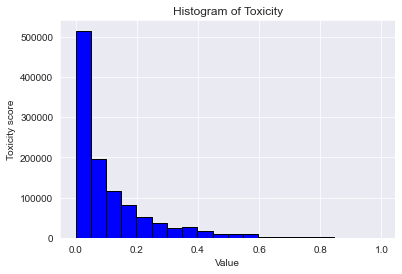

In [3]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(results['toxicity'], color = 'blue', edgecolor = 'black', bins=20)

# Add labels
plt.title('Histogram of Toxicity')
plt.xlabel('Value')
plt.ylabel('Toxicity score')

In [11]:
toxic = res[res["toxicity"]>0.5]

In [14]:
pd.Series(toxic["user_screen_name"]).value_counts().sort_values(ascending=False)[:20]

trincherov         127
Piero42395724      126
il_brigante07      101
xenonian1           81
GiovannaSandr16     80
Graziel65255465     77
Attyla91461568      73
Sakurauchi_Hime     66
gaiagioiared        62
manu_etoile         55
IAlianna_           55
ItalianoeRomano     54
ManuQ24916888       53
vallegiorgio41      52
Pietro_Otto         49
tiber_h             49
razorblack66        48
jobwithinternet     48
PazuDaemon          48
LPincia             48
Name: user_screen_name, dtype: int64

In [16]:
toxic[toxic["user_screen_name"]=="Sakurauchi_Hime"]

,text,toxicity,id,user_screen_name
1273,Una fila di poveri coglioni ipocondriaci del c...,0.713827,1367536157781860360,Sakurauchi_Hime
93893,Fate ridere 😂😂😂 l'unica cosa a -70° sono i vos...,0.655660,1342866243771052032,Sakurauchi_Hime
96295,Mi raccomando coglioni e ipocondriaci del caxx...,0.734456,1363545101230891008,Sakurauchi_Hime
114621,Leggete con attenzione queste chat. A tutti i ...,0.555084,1359574737211564041,Sakurauchi_Hime
122255,"Andate a fare in culo, teste di cazzo. Meritat...",0.830203,1372576593915297793,Sakurauchi_Hime
...,...,...,...,...
2367800,IlPrimatoN pensa te che presa per il culo. mil...,0.661131,1341525584644632577,Sakurauchi_Hime
2386756,Ho passato 1 anno di chemioterapia: mai masche...,0.553564,1313077713297604608,Sakurauchi_Hime
2388760,"Una pillola per sterminare l'infante, una per ...",0.553564,1292185929940115458,Sakurauchi_Hime
2426945,Se esci alla fottuta aria aperta senza mascher...,0.553564,1369690198553092097,Sakurauchi_Hime
